In [1]:
import xarray as xr
#import scipy.interpolate as sci
from resize import Resize
import numpy as np
import matplotlib.pyplot as plt
#import PIL
#import os

In [2]:
ds = xr.open_dataset(r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN.nc')
ds.attrs['crs']='EPSG:4326'
ds
#lon=x, lat=y
#so the precipitaion is represented as (time,x,y)

<xarray.Dataset> Size: 48MB
Dimensions:        (time: 8766, lon: 35, nv: 2, lat: 35)
Coordinates:
  * time           (time) datetime64[ns] 70kB 2000-01-01 ... 2023-12-31
  * lat            (lat) float32 140B 37.88 37.62 37.38 ... 29.88 29.62 29.38
  * lon            (lon) float32 140B 71.88 72.12 72.38 ... 79.88 80.12 80.38
Dimensions without coordinates: nv
Data variables:
    lon_bnds       (time, lon, nv) float32 2MB ...
    lat_bnds       (time, lat, nv) float32 2MB ...
    precipitation  (time, lon, lat) float32 43MB ...
Attributes: (12/38)
    datetime:                   2000-01-01
    Conventions:                CF-1.6
    title:                      NOAA Climate Data Record (CDR) of Precipitati...
    comment:                    Daily PERSIANN-CDR precipitation estimates fo...
    source:                     GRIDSAT-B1.2000.01.01.00.v02r01.nc,GRIDSAT-B1...
    Metadata_Conventions:       CF-1.6,Unidata Dataset Discovery v1.0, NOAA C...
    ...                         ...
    cdr_program:                NOAA Climate Data Record Program
    cdr_variable:               precipitation
    metadata_link:              gov.noaa.ncdc:C00854
    product_version:            v01r01
    spatial_resolution:         0.25 degrees
    crs:                        EPSG:4326

In [3]:
df=ds.to_dataframe().reset_index()
df.drop(columns=['nv','lon_bnds','lat_bnds'],inplace=True)
df

,time,lon,lat,precipitation
0,2000-01-01,71.875,37.875,0.000000
1,2000-01-01,71.875,37.625,0.000000
2,2000-01-01,71.875,37.375,0.000000
3,2000-01-01,71.875,37.125,0.000000
4,2000-01-01,71.875,36.875,0.000000
...,...,...,...,...
21476695,2023-12-31,80.375,30.375,0.237149
21476696,2023-12-31,80.375,30.125,0.680804
21476697,2023-12-31,80.375,29.875,0.133978
21476698,2023-12-31,80.375,29.625,0.000000


In [4]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,time,lon,lat,precipitation
0,2000-01-01,71.875,37.875,0.000000
1,2000-01-01,71.875,37.625,0.000000
2,2000-01-01,71.875,37.375,0.000000
3,2000-01-01,71.875,37.125,0.000000
4,2000-01-01,71.875,36.875,0.000000
...,...,...,...,...
10738345,2023-12-31,80.375,30.375,0.237149
10738346,2023-12-31,80.375,30.125,0.680804
10738347,2023-12-31,80.375,29.875,0.133978
10738348,2023-12-31,80.375,29.625,0.000000


In [5]:
df.isna().sum()

time                0
lon                 0
lat                 0
precipitation    7650
dtype: int64

The resolution change is not exact.


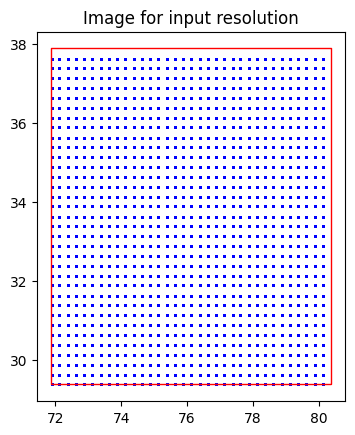

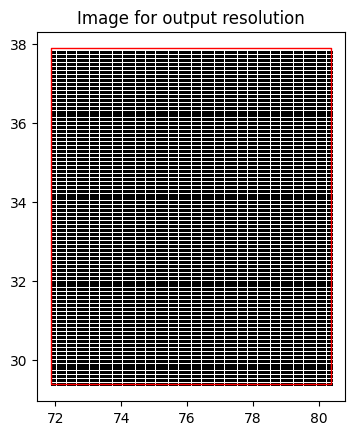

dims of 0.1 grid=  (84.0, 84.0)

dims of 0.25 grid=  (32.0, 32.0)
Extent in y and x (in km): 792.7634500963972 2761.0013292401936


In [6]:
pr=Resize()
pr.res_change(71.875,29.375,80.375,37.875,0.25,0.1)

from interpolating import Interpolate
ip=Interpolate()
df_new=ip.interpolate_values(r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN.nc')
df_new

In [7]:
def show_raw_data( data_pth, num_samples=5):
    ds = xr.open_dataset(data_pth)

    precipitation = ds['precipitation'].values

    print(f"Raw data shape: {precipitation.shape}")
    print(f"Raw data range: [{precipitation.min()}, {precipitation.max()}]")
    print(f"Raw data mean: {precipitation.mean()}")
    print(f"Raw data std: {precipitation.std()}")

    sample_indices = np.linspace(0, precipitation.shape[0] - 1, num_samples, dtype=int)

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    if num_samples == 1:
        axes = [axes]

    for i, ax in zip(sample_indices, axes):
        im = ax.imshow(precipitation[i], cmap='viridis')
        ax.set_title(f'Raw - Time step: {i}')
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [8]:
#trying interpolation direclty from image.
from interpolating import image_interpolation
obj=image_interpolation()
images=obj.make_image(r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN.nc')

  0%|          | 0/8766 [00:00<?, ?it/s]c:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\processing\interpolating.py:103: RuntimeWarning: invalid value encountered in divide
  data_normalized = (255 * (data - np.min(data)) / (np.ptp(data))).astype(np.uint8)
c:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\processing\interpolating.py:103: RuntimeWarning: invalid value encountered in cast
  data_normalized = (255 * (data - np.min(data)) / (np.ptp(data))).astype(np.uint8)
100%|██████████| 8766/8766 [00:00<00:00, 30945.47it/s]


In [9]:
interpolated_images,interpolated_data=obj.interpolate_images(images,0.25,0.1)
#obj.save_xarray(interpolated_data,r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN.nc',r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN_interp.nc')

In [10]:
ds=xr.open_dataset(r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN_Interpolated_centroids.nc')#inter_down=obj.downscale_images(images,0.25,0.1)

Raw data shape: (8766, 35, 35)
Raw data range: [nan, nan]
Raw data mean: nan
Raw data std: nan


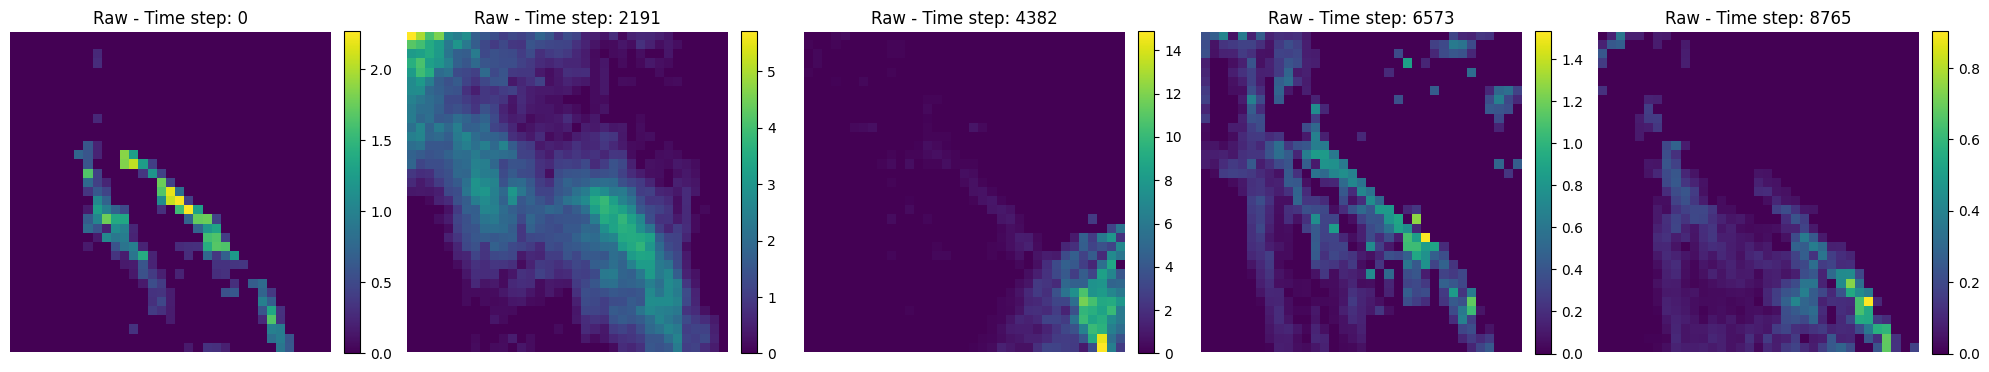

In [11]:
show_raw_data(r'c:\Users\Ankit\Documents\Vedanshi\nc_merged\CROWN.nc',5)

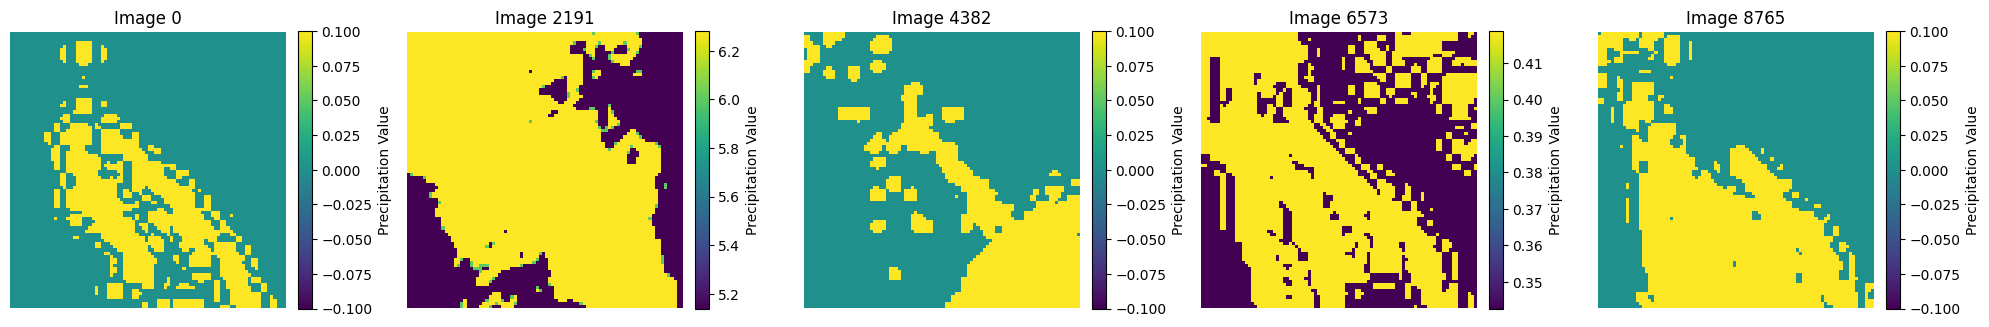

In [12]:
obj.show_images(interpolated_images,ds)

#saving the images 
obj.save_images(interpolated_images,r'C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data\img_data')
obj.save_images(images,r'C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data\img_data')

from dataloader import process_images
#train_set,test_set=split_train_test(interpolated_images,.9)
process_images([images,interpolated_images],r'C:\Users\Ankit\Documents\Vedanshi\nc_merged',64,0.9)

import torch
train=torch.load(r'C:\Users\Ankit\Documents\Vedanshi\nc_merged_train.pth')
train.__len__()

In [13]:
images

[<PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L size=35x35>,
 <PIL.Image.Image image mode=L s

In [14]:
# Example usage
from dataloader_1 import process_images
if __name__ == "__main__":
    # Example with directories
    lr_input = images
    hr_input = interpolated_images
    save_path = r"C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data"
    batch_size = 64
    tts_ratio = 0.9

    train_loader, test_loader = process_images(lr_input, hr_input, save_path, batch_size=batch_size, tts_ratio=tts_ratio)


Train DataLoader saved to C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data_train.pth
Test DataLoader saved to C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data_test.pth


In [17]:
from dataloader_1 import load_dataloader
dataloader=load_dataloader(r"C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data_train.pth",64)
len(dataloader.dataset)

for data in dataloader:
    print(data[0].shape)  # Shape of low-resolution images in the batch
    print(data[1].shape)  # Shape of high-resolution images in the batch
    break  



torch.Size([64, 3, 35, 35])
torch.Size([64, 3, 88, 88])


In [19]:
from dataloader_1 import load_dataloader
dataloader=load_dataloader(r"C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data\CROWN_train.pth",64)
len(dataloader.dataset)

for data in dataloader:
    print(data[0].shape)  # Shape of low-resolution images in the batch
    print(data[1].shape)  # Shape of high-resolution images in the batch
    break  

ModuleNotFoundError: No module named 'dataloader'

In [25]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def visualize_lr_hr_pair(lr_image, hr_image, num_pairs=3):
    # Convert tensors to PIL images
    to_pil = transforms.ToPILImage()
    
    fig, axes = plt.subplots(num_pairs, 2, figsize=(10, 5*num_pairs))
    
    for i in range(num_pairs):
        if i < len(lr_image):
            # Display LR image
            axes[i, 0].imshow(to_pil(lr_image[i]))
            axes[i, 0].set_title(f'LR Image {i+1}')
            axes[i, 0].axis('off')
            
            # Display HR image
            axes[i, 1].imshow(to_pil(hr_image[i]))
            axes[i, 1].set_title(f'HR Image {i+1}')
            axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

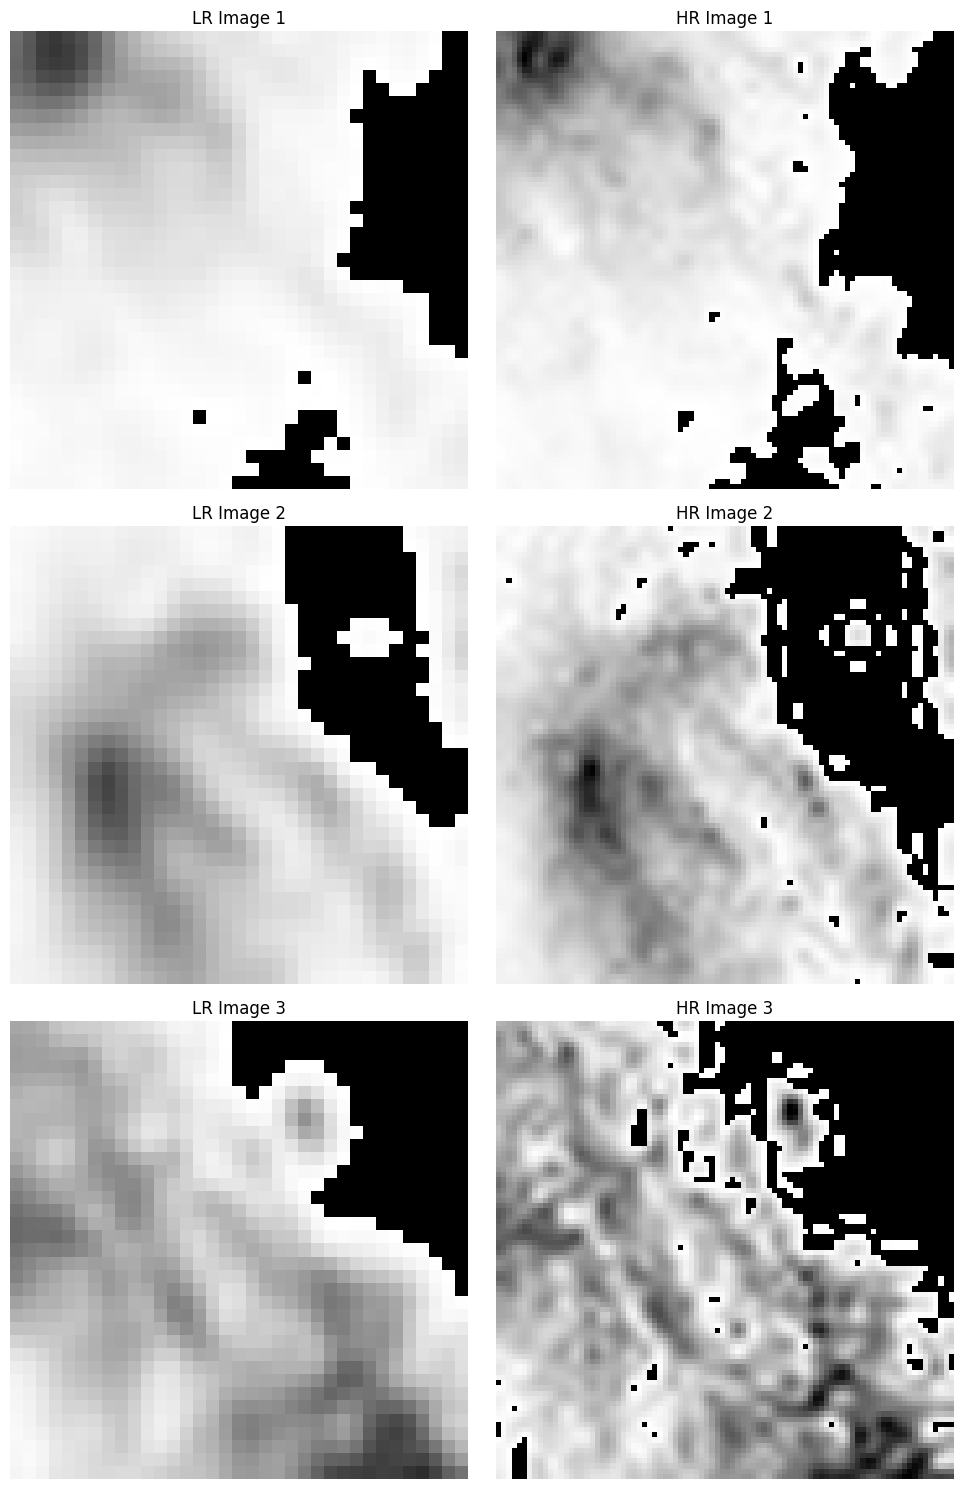

In [26]:
dataiter = iter(dataloader)
lr_batch, hr_batch = next(dataiter)

# Visualize 3 pairs from the batch
visualize_lr_hr_pair(lr_batch, hr_batch, num_pairs=3)